<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ML.jpg" alt="Drawing" style="width:1000px;">


# <center> **05. Machine learning: an introduction!** </center>


## **Outline**

[**1. Introduction to Classification**](#eje1)

[**2. A naive example for Naive classifiers: trilobites**](#eje2)

[**3. The Naive Gaussian Bayes: Solving a real classification problem**](#eje3)

[**4. Metrics and Evaluation on classification**](#eje4)
    

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [ ]:
#@title 2. **LOAD LIB** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

# **1. Introduction to Classification**  <a name="eje1">

   - The classification is the problem of predicting a discrete class label output for an example.
   - The regression is the problem of predicting a continuous quantity output for an example
    
**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t) = \left \{ x_1, x_2, \ldots x_n  \right \}$ is input data, while $y(t) = \left \{0,1 \right \}$ is output data. For classification, $y(t)$ are discrete output variables. For instance, an e-mail can classified as "spam" and "nor-spam"


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/PipelineImage.jpg" style="width:1000px;">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What means features?
- What is supervised learning?
- Which means learn in artifitial intelligencence?


### Some examples...

### <span style="color:green">Go to presentation: Intro_ML.pdf .. !! </span>

1. Text categorization (spam filtering)
2. fraud detection
3. Optical character recognition
4. machine vision (face and action recognition)
5. natural-language processing (spoken languaje recognition)
6. market segmentation (predict if customer will respond to a promotion)
7. bioinformatics (classify proteins according their function)



# **2.  A naive example for Naive classifiers: trilobites** <a name="eje2"></a>
    
    

It is a simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

## - **Comeback to trilobites example**

- Load data and write on machine learning scheme (features and labels)


In [ ]:
tr2 = pd.read_csv("data/trilobites2.csv.gz")
print(tr2.shape)
tr2["label"] = 1
tr2.head()

(10000, 2)


length     width  label
0  3.296118  1.764364      1
1  3.969045  1.475128      1
2  3.647413  2.588947      1
3  3.123894  2.413815      1
4  4.761038  2.168524      1

In [ ]:
#@title **code** Load data
tr1 = pd.read_csv("data/trilobites1.csv.gz").sample(frac=.5)
print(tr1.shape)
tr1["label"] = 0
tr2 = pd.read_csv("data/trilobites2.csv.gz")
print(tr2.shape)
tr2["label"] = 1
d = pd.concat((tr1, tr2)).sample(frac=1).reset_index(drop=True)
del(d["width"])
print(d.shape)
d.head()

(5000, 2)
(10000, 2)
(15000, 2)


length  label
0  3.740721      0
1  3.759473      0
2  1.793460      1
3  3.667391      0
4  3.510797      1

Text(0.5, 0, 'length')

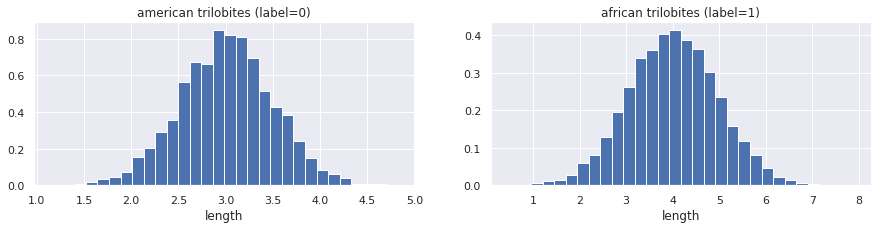

In [ ]:
#@title **code:** To visualize distribution of both classes
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.hist(d[d.label==0].length.values, bins=30, density=True)
plt.title("american trilobites (label=0)")
plt.xlabel("length")
plt.subplot(122)
plt.hist(d[d.label==1].length.values, bins=30, density=True);
plt.title("african trilobites (label=1)")
plt.xlabel("length")

Given a new trilobite $x$ for which we do not know its class, Naive Bayes works as follows to estimate it:
    
- Estimate $P(0|x)$ and $P(1|x)$, the probability of the class being 0 or 1 given the piece of data that we have now ($x$)
- Choose the one with highest probability.

Stop and think from a Bayesian perspective. What information we had before seeing $x$?

Using Bayes:

$$P(0|x) = \frac{P(x|0) P(0)}{P(x)} \;\;\;\;\;\;\;\;P(1|x) = \frac{P(x|1) P(1)}{P(x)}$$

- $P(0)$ and $P(1)$ is the probability of seen an american or an african trilobite
- $P(x|0)$ is the probability of our new trilobite $x$ belonging to class 0. $P(x|1)$ likewise for class 1.
- $P(x)$ is the absolute probability of $x$.

How can we compute each term so that we can estimate $P(0|x)$ and $P(1|x)$?

- for $P(0)$ and $P(1)$ we can use the frequencies of appearance observed in our dataset
- for $P(x|0)$ (or $P(x|1)$ we do not know their distributions (their shape in the charts above). We can **assume they are Gaussian** and use the corresponding PDF to compute probabilities.
- $P(x)$ is very hard, but we do not really need it as it is a common factor of $P(0|x)$ and $P(1|x)$, $\in [0,1]$, and we are only interested in their comparison.

Now, for the Gaussian PDF of $P(x|0)$ we need two parameters: $\mu_0$ and $\sigma_0$, which we can estimate using the corresponding items from our dataset.

Let's say our new trilobite has a length of 3.5. Now, we estimate $P(0)$ and $P(1)$, must correspond to the observed frequencies of our classes




In [ ]:
#@title **code** 1. To define: P(0), P(1), x_init
x= 3.5 #@param {type:"number"}


p_0 = np.mean(d.label==0)
p_1 = np.mean(d.label==1)
print ("%.3f %.3f"%(p_0, p_1))

0.333 0.667


build the corresponding PDFs for each class using our dataset

In [ ]:
#@title **code**  2. To construc distributions
lengths0, lengths1 = d[d.label==0].length, d[d.label==1].length
pdf0 = stats.norm(loc=np.mean(lengths0), scale=np.std(lengths0)).pdf
pdf1 = stats.norm(loc=np.mean(lengths1), scale=np.std(lengths1)).pdf

In [ ]:
#@title **code** 3. estimate P(x|0) and P(x|1)
p_x_given_0 = pdf0(x)
p_x_given_1 = pdf1(x)
print ("%.3f %.3f"%(p_x_given_0, p_x_given_1))

0.487 0.362


and finally

In [ ]:
#@title **code** 4. Bayes rule. We get a classification!!
p_0_given_x = p_x_given_0 * p_0
p_1_given_x = p_x_given_1 * p_1
print ("%.3f %.3f"%(p_0_given_x, p_1_given_x))
print ("predicted class:", 0 if p_0_given_x>p_1_given_x else 1)

0.162 0.241
predicted class: 1


##**Thecnical information in complement notes .. !!**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Why this classifier is **Naive**?
- Why this classifier is **Naive Gaussian Bayes** ?
- How it works with different features?


# **3. The Naive Gaussian Bayes: Solving a real classification problem** <a name="eje3"></a>

- An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification
 
-  A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

- It is not necessary the computation of covariance matrix 

## **Go to real-life!: a second example**

see dataset description at: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

load a dataset

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

In [ ]:
#@title **code** To read the dataset
d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print(d.shape) 
d.head()

(1372, 5)


varwt   skewt   curwt   entrwt  class
0  3.62160  8.6661 -2.8073 -0.44699      0
1  4.54590  8.1674 -2.4586 -1.46210      0
2  3.86600 -2.6383  1.9242  0.10645      0
3  3.45660  9.5228 -4.0112 -3.59440      0
4  0.32924 -4.4552  4.5718 -0.98880      0

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

First inspection of data and binary relationships.

- are variables normal?
- what relations do you see?

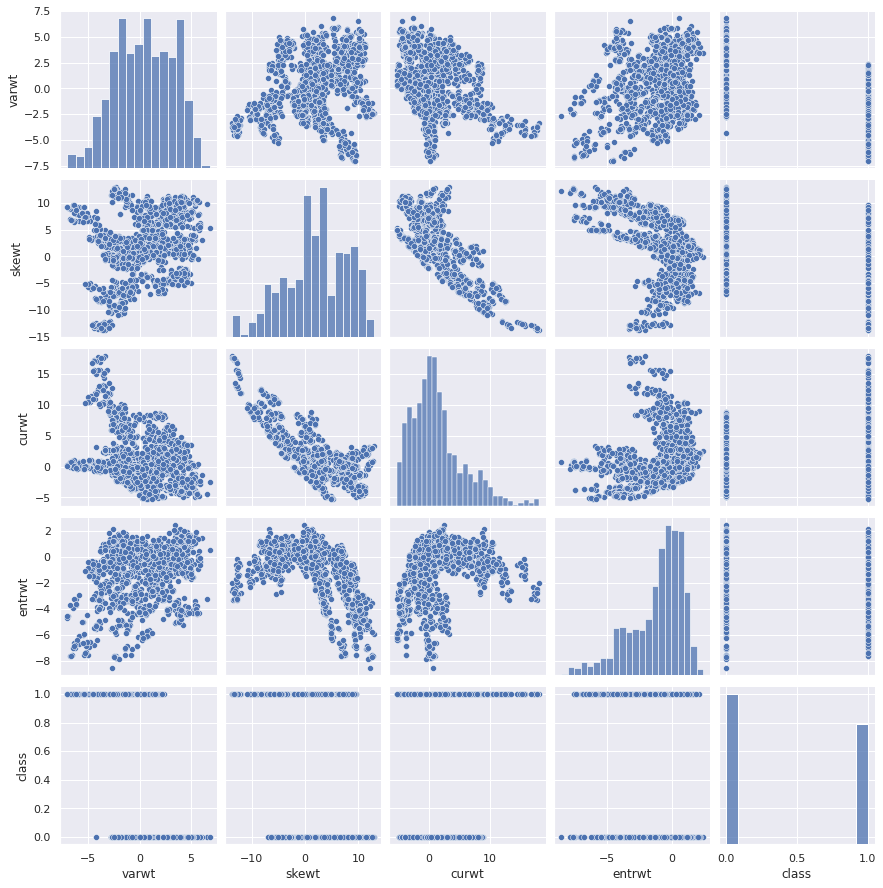

In [ ]:
#@title **code** To observe data
#sns.pairplot(data=d);
sns.pairplot(d, hue="class", diag_kind="hist");# kind="kde"


In [ ]:
#@title **code** 1. Split data.  X: input columns and y: colum to be predicted

X = d.values[:,:-1]
y = d.values[:,-1]

print(X.shape, y.shape)


(1372, 4) (1372,)


In [ ]:
#@title **code** 2. Now create an estimator, train and predict
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
est = GaussianNB()

est.fit(X,y)
predictions = est.predict(X)
print( "first 100 predictions", predictions[:100])
print( "first 100 targets    ", y[:100])


first 100 predictions [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1.]
first 100 targets     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
#@title **code** 3. To obtain the general performance of the approach
#@markdown The simplest and more intuitive metric for classification  is accuracy
print("%.3f"%accuracy_score(predictions, y))

0.841


In [ ]:
#@title **code** Play with new banknote-like specimens.
varwt = 3.36 #@param {type:"number"}
skewt = 8.66 #@param {type:"number"}
curwt = -2.80 #@param {type:"number"}
entrwt = -0.44 #@param {type:"number"}


feature = np.array([varwt, skewt, curwt, entrwt]).reshape(1, -1)
print("La predicción es: ", est.predict(feature))

print("Para una nueva variable")
print(" features: ", X[2], "clase: ", y[2])
print("La predicción es: ", est.predict(X[2].reshape(1, -1)))

La predicción es:  [0.]
Para una nueva variable
 features:  [ 3.866   -2.6383   1.9242   0.10645] clase:  0.0
La predicción es:  [0.]


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- The validation of the approach is correct?
- We can take high confidence of such approach?

**Wait!**. We are cheating!! cannot use same data for training and for test. let's use the first half for training and the rest for test

In [ ]:
#@title **code:** A new experiment over the same data!
n = int(len(X)/2)
est.fit(X[:n], y[:n])
print("%.3f"%accuracy_score(est.predict(X[n:]), y[n:]))

0.111


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What happened?!?!?
- Why so different?

In [ ]:
#@title **code** Let see
print("first 100", y[:100])
print("last  100", y[-100:])
print("class distribution", [(i, sum(y==i)) for i in np.unique(y)])

first 100 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
last  100 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
class distribution [(0.0, 762), (1.0, 610)]


data is not shuffled, we are training only with one class. understand next chart and how it is built

Text(0.5, 0, 'n')

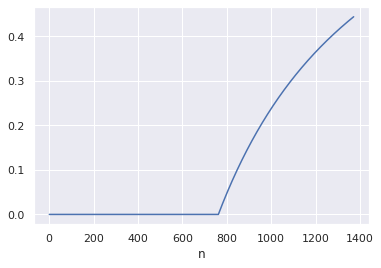

In [ ]:
#@title **code** Plot
t = range(1,len(y))
p = [np.mean(y[:i]) for i in t]
plt.plot(t,p)
plt.xlabel("n")

# **4. Metrics and Evaluation on classification** <a name="eje4"></a> 

Let's use cross validation and build more confidence in our results

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/kfold.jpg" style="width:400px;">

In [ ]:
#@title **code:** cross-validation 
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.85507246 0.76811594 0.83941606 0.83211679 0.82481752 0.81021898
 0.8540146  0.89781022 0.83941606 0.8540146 ]
accuracy 0.838 (+/- 0.03201)


let's understand better how this estimator is performing.

- TPR: true positive rate (sensitivity), e.g.,  the percentage of sick people who are correctly identified as having the condition
- TNR: true negative rate (specificity), e.g., the percentage of healthy people who are correctly identified as not having the condition

From Wiki: 

- True positive: Sick people correctly identified as sick
- False positive: Healthy people incorrectly identified as sick
- True negative: Healthy people correctly identified as healthy
- False negative: Sick people incorrectly identified as healthy

In general

- True positive = correctly identified
- False positive = incorrectly identified
- True negative = correctly rejected
- False negative = incorrectly rejected

In [ ]:
#@title **code** other metrics
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
#@title **code** we can obtain performance with different metrics
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print ("tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print ("tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

tpr 0.792 (+/- 0.05529)
tnr 0.880 (+/- 0.03517)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now, we will work with the **Dataset de cancer de mama**
- use the  sklearn: `from sklearn.datasets import load_breast_cancer`
- To get a classifier using a particular partition (train=80, test=20)
- To do a classifier using a K-fold of 10
- We can explore for small datasets the leave-one patient out. To do a evalaution using this thecnique. 

mean radius  mean texture  ...  worst fractal dimension  diagnosis
0        17.99         10.38  ...                  0.11890        0.0
1        20.57         17.77  ...                  0.08902        0.0

[2 rows x 31 columns]

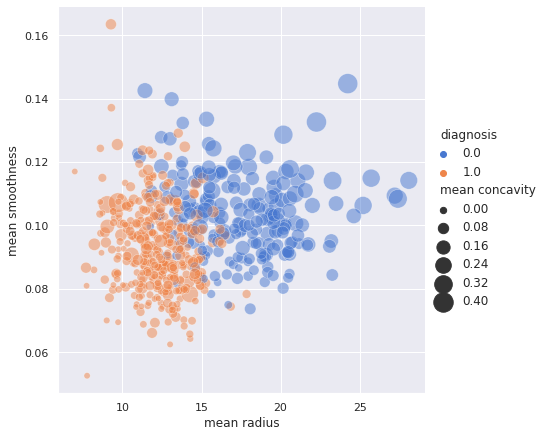

In [ ]:
#@title **Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **code student**




# **References**

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
